In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from my_img_processor import My_Image
import matplotlib as mpl
import cv2
from scipy.ndimage import label

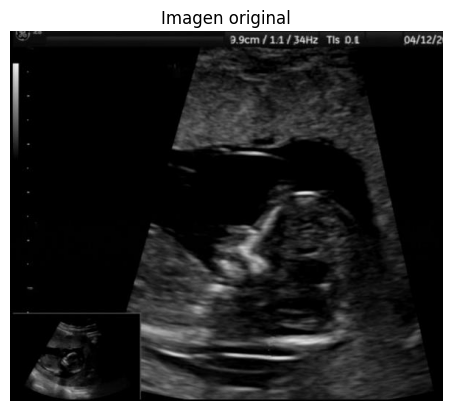

In [19]:
img_path = r'Dataset for Fetus Framework\Dataset for Fetus Framework\External Test Set\Standard\1426.png'
raw_img = My_Image(img_path)

fig_raw, ax_raw = plt.subplots()
ax_raw.imshow(raw_img, vmin=0, vmax=255, cmap='gray')
ax_raw.set_title('Imagen original')
plt.axis('off')
plt.show()

In [20]:
def binarizar_otsu(imagen):
    if len(imagen.shape) == 3:
        imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    else:
        imagen_gris = imagen
    _, imagen_binaria = cv2.threshold(imagen_gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return imagen_binaria
def obtener_coordenadas_puntos_blancos(imagen_binaria):
    coordenadas = np.where(imagen_binaria == 255)
    return coordenadas
def etiquetar_componentes(imagen_binaria):
    estructura = np.ones((3, 3), dtype=int) 
    imagen_etiquetada, num_features = label(imagen_binaria, structure=estructura)
    return imagen_etiquetada, num_features

imagen = cv2.imread(img_path)
imagen_binaria = binarizar_otsu(imagen)
coordenadas_blancos = obtener_coordenadas_puntos_blancos(imagen_binaria)
imagen_etiquetada, num_features = etiquetar_componentes(imagen_binaria)
imagen_etiquetada_uint8 = (imagen_etiquetada * (255 // num_features)).astype(np.uint8)


cv2.imwrite('imagen_etiquetada.png', imagen_etiquetada_uint8)
cv2.imshow('Imagen Etiquetada', imagen_etiquetada_uint8)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [21]:
def invertir_imagen(imagen):
    return 255 - imagen

#Función para extraer un área alrededor de un punto basado en la intensidad
def extraer_area_por_intensidad(imagen, punto):
    intensidad_punto = imagen[punto[1], punto[0]]
    mascara = np.zeros_like(imagen, dtype=np.uint8)
    puntos_a_revisar = [punto]
    direcciones = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    while puntos_a_revisar:
        x, y = puntos_a_revisar.pop()
        if x < 0 or y < 0 or x >= imagen.shape[1] or y >= imagen.shape[0]:
            continue
        if mascara[y, x] == 0 and imagen[y, x] == intensidad_punto:
            mascara[y, x] = 255
            for dx, dy in direcciones:
                puntos_a_revisar.append((x + dx, y + dy))
    
    return mascara
imagen_etiquetada = cv2.imread('imagen_etiquetada.png', cv2.IMREAD_GRAYSCALE) 
imagen_invertida = invertir_imagen(imagen_etiquetada)
#Definir el punto 
punto = (342, 432)
#Extraer el area
area_extraida = extraer_area_por_intensidad(imagen_invertida, punto)

cv2.imwrite('imagen_area_extraida.png', area_extraida)
cv2.imshow('Imagen Area Extraida', area_extraida)
cv2.waitKey(0)
cv2.destroyAllWindows()
